In [6]:
%load_ext autoreload
%autoreload 2

from src.utils.env_creation import create_tree, create_init
from src.utils.mouselab_jas import MouselabJas
from src.utils.data_classes import MouselabConfig
from src.utils.utils import sigma_to_tau
import numpy as np
from simulation import run_simulation
from src.policy.jas_voc_policy import JAS_voc_policy
from src.policy.jas_policy import RandomPolicy, ExhaustivePolicy, RandomNPolicy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Fixed from paper
num_projects = 5
num_criteria = 6
weights = [0.0206795, 0.0672084, 0.2227102, 0.1067428, 0.4665054, 0.1161537]
expert_stds = [1.5616618964384956, 1.449172525995787, 1.5205992970609392, 1.5469422429523034, 1.511270787760881, 1.455189251463794]
expert_taus = sigma_to_tau(np.array(expert_stds))

mu = [3.6, 3.1666666666666665, 3.6, 3.1333333333333333, 3.6666666666666665, 2.3]
sigma = [1.3544307876819288, 1.2617266038997932, 1.3796551293211172, 1.2521246311585852, 1.5161960871578068, 0.9523111632886272]

init = create_init([0]+(mu*num_projects), [0]+(sigma*num_projects))
expert_costs = [0.002]*6

config = MouselabConfig(num_projects, num_criteria, expert_costs, expert_taus, init, criteria_scale=weights)
env = MouselabJas(config=config)

In [8]:
env.expected_term_reward(env.state)

3.401163603333334

In [9]:
voc_policy = JAS_voc_policy()
random_policy = RandomPolicy()
exhaustive_policy = ExhaustivePolicy()
random_6_policy = RandomNPolicy(N=6)

In [10]:
res_random = run_simulation(env, random_policy, n=100)
res_exhaustive = run_simulation(env, exhaustive_policy, n=100)
res_random_6 = run_simulation(env, random_6_policy, n=100)
res_voc = run_simulation(env, voc_policy, n=100)

res_voc["algorithm"] = "MGPO"
res_exhaustive["algorithm"] = "Exhaustive"
res_random["algorithm"] = "Random"
res_random_6["algorithm"] = "Random 6"
res = pd.concat([res_voc, res_random_6, res_exhaustive, res_random])

In [16]:
res[["reward", "actions", "algorithm"]].groupby("algorithm").agg(["mean", "std"])

reward           actions           
                mean       std    mean        std
algorithm                                        
Exhaustive  2.877870  0.339607  181.00   0.000000
MGPO        3.393314  0.305544   17.90   7.076066
Random      3.170116  0.321981  101.07  55.362945
Random 6    3.431362  0.093957    7.00   0.000000

Text(0, 0.5, 'Actions')

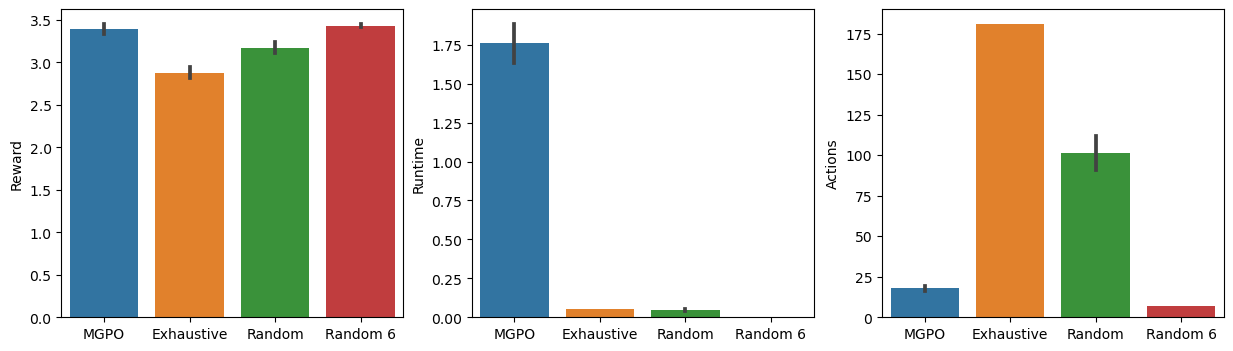

In [11]:

fig, axes = plt.subplots(1,3, figsize=(15,4), sharex=False, sharey=False)
axes = axes.flatten()

g = sns.barplot(data=res, x="algorithm", y="reward", ax=axes[0])
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Reward")

g = sns.barplot(data=res, x="algorithm", y="runtime", ax=axes[1])
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Runtime")

g = sns.barplot(data=res, x="algorithm", y="actions", ax=axes[2])
g.set_title("")
g.set_xlabel("")
g.set_ylabel("Actions")